In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from utils import TextPreprocessor
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['text example']


In [2]:
df = pd.read_csv('data/gold.csv') #import du dataset

1. Bag of words

    Preprocessing

In [3]:
df

,Text,Emotion,Tokens
0,i didnt feel humiliated,sadness,['humiliated']
1,i can go from feeling so hopeless to so damned...,sadness,"['hopeless', 'damned', 'hopeful', 'care', 'awa..."
2,im grabbing a minute to post i feel greedy wrong,anger,"['grabbing', 'minute', 'post', 'greedy', 'wrong']"
3,i am ever feeling nostalgic about the fireplac...,love,"['ever', 'nostalgic', 'fireplace', 'property']"
4,i am feeling grouchy,anger,['grouchy']
...,...,...,...
21451,melissa stared at her friend in dism,fear,"['melissa', 'stared', 'friend', 'dism']"
21452,successive state elections have seen the gover...,fear,"['successive', 'state', 'election', 'seen', 'g..."
21453,vincent was irritated but not dismay,fear,"['vincent', 'irritated', 'dismay']"
21454,kendall-hume turned back to face the dismayed ...,fear,"['kendall-hume', 'turned', 'face', 'dismayed',..."


In [4]:
X = df.Text    #Feature
y = df.Emotion  #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Division données de test et d'entraînement

In [5]:
bow_pipeline = make_pipeline(
    TextPreprocessor(),                             # Preprocessor
    CountVectorizer(),                              # Vectorizer           
    LogisticRegression(max_iter=2000, tol=0.0001)   # Classifier 
)

    Entraînement

In [6]:
bow_pipeline.fit(X_train, y_train)

Pipeline(steps=[('textpreprocessor', TextPreprocessor()),
                ('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [7]:
bow_predictions = bow_pipeline.predict(X_test)

    Score

In [8]:
accuracy_score(y_test, bow_predictions)

0.8883970177073626

In [9]:
pred_text = "i'm so annoyed for no fucking reason"
X_pred = bow_pipeline.named_steps['countvectorizer'].transform([pred_text])
predictions = bow_pipeline.named_steps['logisticregression'].predict(X_pred)
predictions

array(['anger'], dtype=object)

    Performances

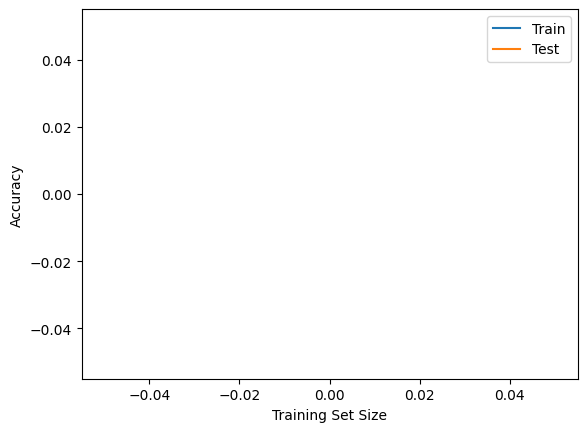

In [10]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
# Définir votre modèle et vos données d'entraînement X_train, y_train

train_sizes, train_scores, test_scores = learning_curve(estimator=bow_pipeline.named_steps['logisticregression'], X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, test_mean, label='Test')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()
